In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import Parallel, delayed
from string import ascii_lowercase
import pandas as pd
from functions import *
import os

pwd = os.getcwd()
path = "%s/Data" % pwd

# Fig. 1

<Figure size 640x480 with 0 Axes>

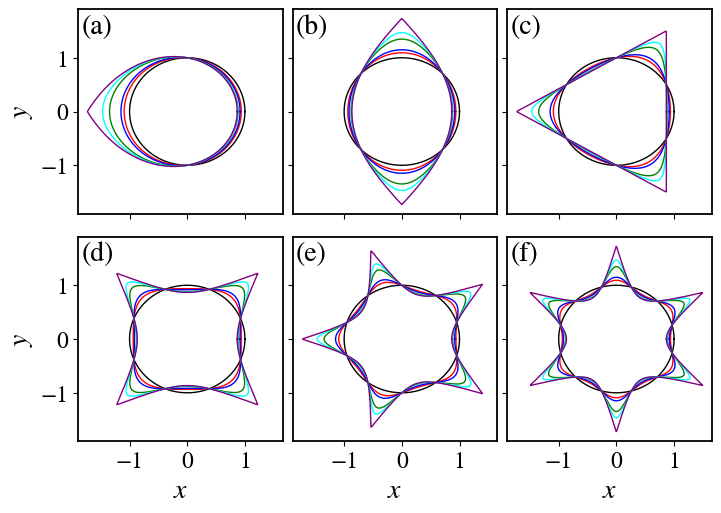

In [2]:
theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
gamma = [1, 2, 3, 4, 5, 6]
eps = [0.0, 0.15, 0.3, 0.75, 0.9, 0.99999]
colors = ["black", "red", "blue", "green", "cyan", "purple"]
xbox = 0.014
ybox = 0.8845
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
plot_params(fontsize=20)
lw = 1
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(7, 5))
for i,g in enumerate(gamma):
    for j, e in enumerate(eps):
        radius = R(g, e, theta)
        x = radius*np.cos(theta)
        y = radius*np.sin(theta)
        if i == 2:
            leg = ax[int(i / 3), i % 3].plot(x, y, label="$\\epsilon = %g$" % e, lw=lw, c=colors[j])
        else:
            ax[int(i / 3), i % 3].plot(x, y, lw=lw, c=colors[j])
        ax[int(i / 3), i % 3].set_box_aspect(1)
        ax[int(i / 3), i % 3].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[int(i / 3), i % 3].transAxes, bbox=bbox)
#ax[0, 2].legend(bbox_to_anchor=(1.04, 1), loc="upper left", frameon=False)
ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")
ax[1, 2].set_xlabel("$x$")
plt.subplots_adjust(left=0.09, bottom=0.09, right=0.995, top=1, hspace=0.0, wspace=0.05)
plt.savefig("Figures/fig1.png", dpi=500)

# Fig. 2

<Figure size 640x480 with 0 Axes>

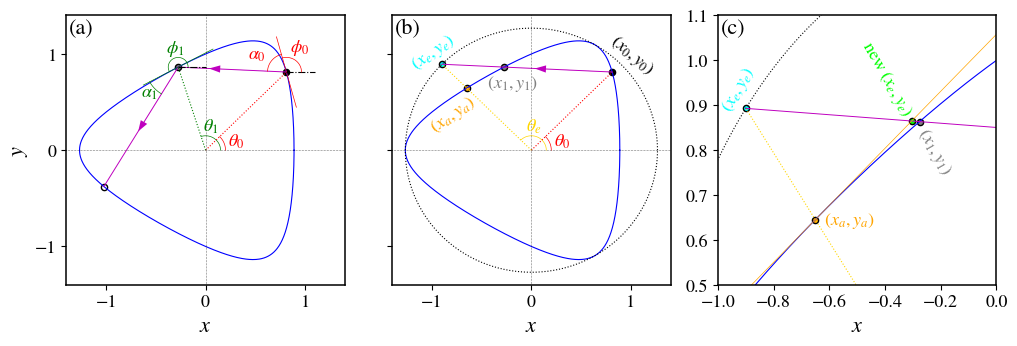

In [3]:
plot_params(fontsize=16, axes_linewidth=1.1)
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))
xbox = 0.01
ybox = 0.932
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
#ax[0].set_aspect('equal', adjustable='box')
fs = 13
gamma = 3
eps = 0.6
xmin = -1.4
xmax = 1.4
ymin = -1.4
ymax = 1.4
Rmax = R(gamma, eps, np.pi/gamma)
N = 1000
theta = np.linspace(0, 2*np.pi, N)

x = R(gamma, eps, theta)*np.cos(theta)
y = R(gamma, eps, theta)*np.sin(theta)
ax[0].plot(x, y, 'b-', linewidth=0.8)
ax[1].plot(x, y, 'b-', linewidth=0.8)
ax[2].plot(x, y, 'b-', linewidth=0.8)
Rmax = R(gamma, eps, np.pi/gamma)
x = Rmax*np.cos(theta)
y = Rmax*np.sin(theta)
ax[1].plot(x, y, 'k:', linewidth=0.8)
ax[2].plot(x, y, 'k:', linewidth=0.8)

theta0 = np.pi/4
alpha0 = np.pi/2.5
ts = time_series(theta0, alpha0, gamma, eps, 3)
ps = phase_space(theta0, alpha0, gamma, eps, 3)
x0 = ts[0, 0]
y0 = ts[0, 1]
R0 = R(gamma, eps, theta0)
Rl = dRdtheta(R0, gamma, eps, theta0)
xl = Rl*np.cos(theta0) - y0
yl = Rl*np.sin(theta0) + x0
phi0 = np.arctan2(yl, xl) % (2*np.pi)
mu0 = (alpha0 + phi0) % (2*np.pi)
dx0 = np.cos(mu0)/1.5 #-0.2
dy0 = np.sin(mu0)/1.5 #-0.02
b = 2*(x0*np.cos(mu0) + y0*np.sin(mu0))
c = x0**2 + y0**2 - Rmax**2
dte = (-b + np.sqrt(b**2 - 4*c))/2
xe = x0 + np.cos(mu0)*dte
ye = y0 + np.sin(mu0)*dte
thetae = np.arctan2(ye, xe)
xa = R(gamma, eps, thetae)*np.cos(thetae)
ya = R(gamma, eps, thetae)*np.sin(thetae)
Ra = R(gamma, eps, thetae)
Rla = dRdtheta(Ra, gamma, eps, thetae)
xla = Rla*np.cos(thetae) - ya
yla = Rla*np.sin(thetae) + xa
dte = (ya - y0 + (yla/xla)*(x0 - xa))/(np.sin(mu0) - (yla/xla)*np.cos(mu0))
xe_new = x0 + np.cos(mu0)*dte
ye_new = y0 + np.sin(mu0)*dte
#########
x1 = ts[1, 0]
y1 = ts[1, 1]
theta1 = np.arctan2(y1, x1)
alpha1 = ps[1, 1]
R1 = R(gamma, eps, theta1)
Rl = dRdtheta(R1, gamma, eps, theta1)
xl = Rl*np.cos(theta1) - y1
yl = Rl*np.sin(theta1) + x1
phi1 = np.arctan2(yl, xl) % (2*np.pi)
mu1 = (alpha1 + phi1) % (2*np.pi)
dx1 = np.cos(mu1)/1.5 #-0.2
dy1 = np.sin(mu1)/1.5 #-0.02
##################
x2 = ts[2, 0]
y2 = ts[2, 1]
theta2 = np.arctan2(y2, x2)
alpha2 = ps[2, 1]
R2 = R(gamma, eps, theta2)
Rl = dRdtheta(R2, gamma, eps, theta2)
xl = Rl*np.cos(theta2) - y2
yl = Rl*np.sin(theta2) + x2
phi2 = np.arctan2(yl, xl) % (2*np.pi)
mu2 = (alpha2 + phi2) % (2*np.pi)
dx2 = np.cos(mu2) #-0.2
dy2 = np.sin(mu2) #-0.02
x3 = ts[3, 0]
y3 = ts[3, 1]

# Plota as letras theta, phi e alpha
ax[0].text(0.23,0.045,'$\\theta_0$', c='r', fontsize=fs)
ax[1].text(0.23,0.045,'$\\theta_0$', c='r', fontsize=fs)
ax[0].text(0.85, 1.025, '$\\phi_0$', c='r', fontsize=fs)
ax[0].text(0.43, 0.95, '$\\alpha_0$', c='r', fontsize=fs)
ax[0].text(-0.025,0.2,'$\\theta_1$', c='g', fontsize=fs)
ax[1].text(-0.05,0.2,'$\\theta_e$', c='gold', fontsize=fs)
ax[0].text(-0.4, 1.02, '$\\phi_1$', c='g', fontsize=fs)
#ax[0].text(-0.65, 0.55, '$\\alpha_1$', c='g', fontsize=fs)
ax[0].text(-0.65, 0.55, '$\\alpha_1$', c='g', fontsize=fs)
# Plota o semi círculo indicando o ângulo inicial
theta = np.linspace(0, theta0, 1000)
xc = 0.2*np.cos(theta)
yc = 0.2*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
ax[1].plot(xc, yc, 'r', linewidth=0.5)
# Plota o semi círculo indicando o ângulo final
theta = np.linspace(0, theta1, 1000)
xc = 0.15*np.cos(theta)
yc = 0.15*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)
# Plota o semi círculo indicando o ângulo externo
theta = np.linspace(0, thetae, 1000)
xc = 0.15*np.cos(theta)
yc = 0.15*np.sin(theta)
ax[1].plot(xc, yc, 'gold', linewidth=0.5)
# Plota a linha do ângulo inicial
ax[0].plot([0, x0], [0, y0], 'r:', linewidth=0.8)
ax[0].plot([0, x1], [0, y1], 'g:', linewidth=0.8)
ax[1].plot([0, x0], [0, y0], 'r:', linewidth=0.8)
ax[1].plot([0, xe], [0, ye], ':', color="gold", linewidth=0.8)
ax[2].plot([0, xe], [0, ye], ':', color="gold", linewidth=0.8)
#plt.text(0.9, 0.12, '$s$')
# Plota os pontos antes e depois da colisão



ax[0].scatter(x0, y0, s=20, c='k', edgecolor='k')
ax[0].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[0].scatter(x2, y2, s=20,c='white', edgecolor='k')
ax[1].scatter(x0, y0, s=20,c='k', edgecolor='k')
ax[1].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[1].scatter(xe, ye, s=20,c='cyan', edgecolor='k')
ax[2].scatter(x1, y1, s=20,c='grey', edgecolor='k')
ax[2].scatter(xe, ye, s=20,c='cyan', edgecolor='k')
ax[1].scatter(xa, ya, s=20,c='orange', edgecolor='k')
ax[2].scatter(xa, ya, s=20,c='orange', edgecolor='k')
ax[2].scatter(xe_new, ye_new, s=20,c='lime', edgecolor='k')
# Plota a reta que liga os pontos antes e depois da colisão
ax[0].plot([x0, x1], [y0, y1], 'm', linewidth=0.7)
ax[0].arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
ax[1].plot([x0, xe], [y0, ye], 'm', linewidth=0.7)
ax[2].plot([x0, xe], [y0, ye], 'm', linewidth=0.7)
ax[1].arrow(x0, y0, dx0, dy0, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')
ax[0].plot([x1, x2], [y1, y2], 'm', linewidth=0.7)
ax[0].arrow(x1, y1, dx1, dy1, shape='full', lw=0, length_includes_head=False, head_width=.075, color='m')



# Plota a reta tangente ao ponto de lançamento
A = np.tan(phi0)
B = y0 - A*x0
xt = np.linspace(x0 - 0.1, x0 + 0.1, 100)
yt = A*xt + B
ax[0].plot(xt, yt, 'r-', linewidth=0.5)
# Plota a reta tangente ao ponto de colisão
A = np.tan(phi1)
B = y1 - A*x1
xt = np.linspace(x1 - 0.35, x1 + 0.35, 100)
yt = A*xt + B
ax[0].plot(xt, yt, 'g-', linewidth=0.5)


# Plota a reta horizontal que mede o ângulo phi
ax[0].plot([x0, 1.1], [y0,y0], 'k-.', linewidth=0.8)
ax[0].plot([x1, 0], [y1, y1], 'k-.', linewidth=0.8)
# Plota o arco indicando os ângulos phi0 e alpha0
theta = np.linspace(0, phi0, 1000)
xc = x0 + 0.152*np.cos(theta)
yc = y0 + 0.152*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
theta = np.linspace(phi0, phi0 + alpha0, 1000)
xc = x0 + 0.19*np.cos(theta)
yc = y0 + 0.19*np.sin(theta)
ax[0].plot(xc, yc, 'r', linewidth=0.5)
# Plota o arco indicando os ângulos phi1 e alpha1
theta = np.linspace(0, phi1, 1000)
xc = x1 + 0.1*np.cos(theta)
yc = y1 + 0.1*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)
theta = np.linspace(phi1, phi1 + alpha1, 1000)
xc = x1 + 0.325*np.cos(theta)
yc = y1 + 0.325*np.sin(theta)
ax[0].plot(xc, yc, 'g', linewidth=0.5)


ax[0].set_yticks([-1, 0, 1])
ax[0].set_xticks([-1, 0, 1])
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
ax[0].plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)

#####################




ax[1].text(0.75,0.8,'$(x_0, y_0)$', c='k', fontsize=fs, rotation=-40)

ax[1].text(-0.45,0.65,'$(x_1, y_1)$', c='grey', fontsize=fs, rotation=0)
ax[2].text(-0.3,0.75,'$(x_1, y_1)$', c='grey', fontsize=fs, rotation=-60)

ax[1].text(-1.25,0.85,'$(x_e, y_e)$', c='cyan', fontsize=fs, rotation=35)
ax[2].text(-1.0005,0.89,'$(x_e, y_e)$', c='cyan', fontsize=fs, rotation=60)

ax[1].text(-1.05,0.2,'$(x_a, y_a)$', c='orange', fontsize=fs, rotation=35)
ax[2].text(-0.62,0.635,'$(x_a, y_a)$', c='orange', fontsize=fs, rotation=0)

ax[2].text(-0.5,0.88,'new $(x_e, y_e)$', c='lime', fontsize=fs, rotation=-60)

for i in range(3):
    ax[i].text(xbox, ybox, '(%s)' % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)

x = np.linspace(-1, 0, 100)
y = ya + (yla/xla)*(x - xa)
ax[2].plot(x, y, "-", color='orange', lw=0.5)


ax[1].set_yticks([-1, 0, 1])
ax[1].set_yticklabels([])
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)
ax[1].set_xlabel("$x$")
ax[2].set_xlim(-1., -0.)
ax[2].set_ylim(0.5, 1.1)
ax[2].set_xlabel("$x$")
#plt.legend(loc='upper center', ncol=2, fancybox=True, shadow=True)#, bbox_to_anchor=(0.5, 1.35))
#plt.tight_layout()
ax[1].plot([0, 0],[ymin, ymax], 'k:', linewidth=0.4)
ax[1].plot([xmin, xmax], [0,0], 'k:', linewidth=0.4)
plt.subplots_adjust(wspace=0.17)
plt.savefig("Figures/fig2.png", dpi=600, bbox_inches='tight', pad_inches=0.05)
#plt.show()

# Fig. 3

In [4]:
gamma = 3
num_coll = int(1e4)
num_ic = 150
epss = [0.2, 0.3, 0.4, 0.45, 0.55, 0.7, 0.8, 0.85]
eh1 = 2*np.pi/3
eh2 = 5*np.pi/6
eh3 = np.pi
eh4 = 5*np.pi/3
esc_holes = np.array([eh1, eh2])

(1500150, 2)
(1500150, 2)
(1500150, 2)
(1500150, 2)
(1500150, 2)
(1500150, 2)
(1500150, 2)
(1500150, 2)


<Figure size 640x480 with 0 Axes>

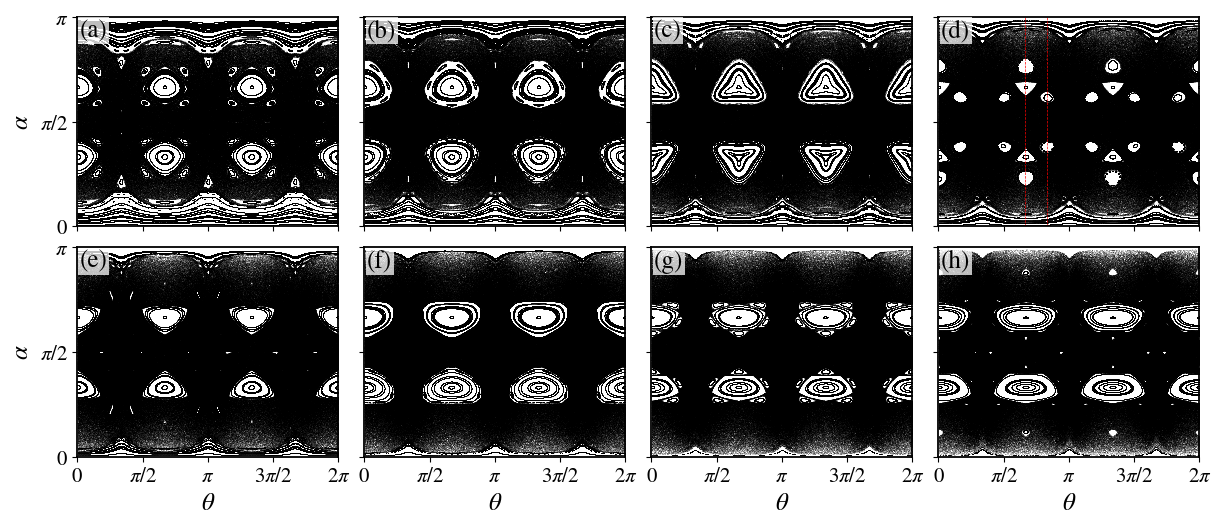

In [5]:
plot_params(fontsize=18)
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12, 5))

np.random.seed(15)
theta = np.random.uniform(0, 2*np.pi, num_ic)
alpha = np.random.uniform(0, np.pi, num_ic)
xbox = 0.00995
ybox = 0.9055
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
for j, eps in enumerate(epss):
    ps = np.array(Parallel(n_jobs=-1)(delayed(phase_space)(theta[i], alpha[i], gamma, eps, num_coll) for i in range(num_ic)))
    ps = ps.reshape((num_ic*(num_coll + 1), 2))
    print(ps.shape)
    ax[int(j / 4), j % 4].plot(ps[:, 0], ps[:, 1], "ko", markersize=0.25, markeredgewidth=0.0)
    ax[int(j / 4), j % 4].text(xbox, ybox, "(%s)" % ascii_lowercase[j], transform=ax[int(j / 4), j % 4].transAxes, bbox=bbox)
    if eps == 0.45:
        for i in range(esc_holes.shape[0]):
            ax[int(j / 4), j % 4].plot([esc_holes[i], esc_holes[i]], [0, 2*np.pi], "r--", lw=0.5)
ax[0, 0].set_xlim(0, 2*np.pi)
ax[0, 0].set_ylim(0, np.pi)
ax[0, 0].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[0, 0].set_xticklabels(["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"])
ax[0, 0].set_yticks([0, np.pi/2, np.pi])
ax[0, 0].set_yticklabels(["$0$", "$\\pi/2$", "$\\pi$"])
[ax[-1, i].set_xlabel("$\\theta$") for i in range(ax.shape[1])]
[ax[i, 0].set_ylabel("$\\alpha$") for i in range(ax.shape[0])]
plt.subplots_adjust(left=0.055, right=0.99, top=0.99, hspace=0.1, wspace=0.1)
plt.savefig("Figures/fig3.png", dpi=500)

# Fig. 4

In [6]:
gamma = 3
eps = 0.45
num_coll = int(2e4)
num_ic = 150
eh1 = 2*np.pi/3
eh2 = 5*np.pi/6
eh3 = np.pi
eh4 = 5*np.pi/3
esc_holes = np.array([eh1, eh2])

<Figure size 640x480 with 0 Axes>

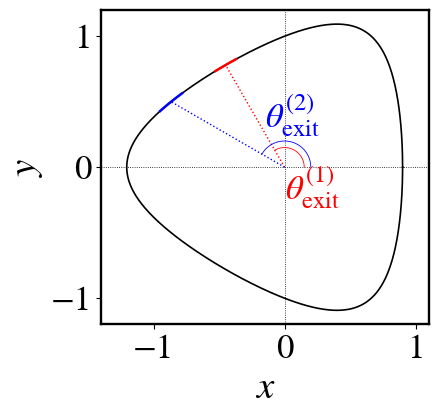

In [7]:
fs = 28
plot_params(fontsize=fs, axes_linewidth=1.7)
lw = 1.2
fig, ax = plt.subplots()

ymin = -1.2
ymax = 1.2
xmin = -1.4
xmax = 1.1
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 0], [ymin, ymax], "k:", lw=lw/2, zorder=0)
ax.plot([xmin, xmax] , [0, 0], "k:", lw=lw/2, zorder=0)
theta = np.linspace(0, 2*np.pi, 1000)
radius = R(gamma, eps, theta)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax.plot(x, y, "k", lw=lw, zorder=1)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
# xit 1
theta = np.linspace(eh1 - 0.1, eh1 + 0.1, 1000)
radius = R(gamma, eps, theta)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax.plot(x, y, "r", lw=1.5*lw, zorder=1)
theta = eh1
radius = R(gamma, eps, theta)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax.plot([0, x], [0, y], "r:", lw=lw/1.2, zorder=1)
theta = np.linspace(0, eh1, 1000)
xc = 0.15*np.cos(theta)
yc = 0.15*np.sin(theta)
ax.plot(xc, yc, 'r', linewidth=lw/2)
# exit 2
theta = np.linspace(eh2 - 0.1, eh2 + 0.1, 1000)
radius = R(gamma, eps, theta)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax.plot(x, y, "b", lw=1.5*lw, zorder=1)
theta = eh2
radius = R(gamma, eps, theta)
x = radius*np.cos(theta)
y = radius*np.sin(theta)
ax.plot([0, x], [0, y], "b:", lw=lw/1.2, zorder=1)
theta = np.linspace(0, eh2, 1000)
xc = 0.2*np.cos(theta)
yc = 0.2*np.sin(theta)
ax.plot(xc, yc, "b", linewidth=lw/2, zorder=1)

ax.text(0.,-0.25,'$\\theta_{\\mathrm{exit}}^{(1)}$', c='r', fontsize=fs - 3, zorder=1)
ax.text(-0.15, 0.3,'$\\theta_{\\mathrm{exit}}^{(2)}$', c='b', fontsize=fs - 3, zorder=1)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

plt.tight_layout()
plt.savefig("Figures/fig4_a.png", dpi=500, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

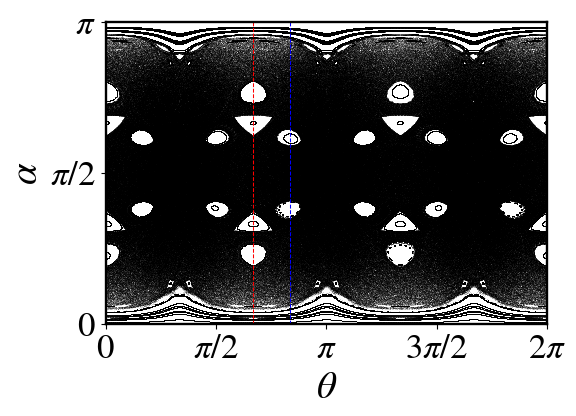

In [8]:
fs = 28
plot_params(fontsize=fs, axes_linewidth=1.7)
fig, ax = plt.subplots()

np.random.seed(15)
theta = np.random.uniform(0, 2*np.pi, num_ic)
alpha = np.random.uniform(0, np.pi, num_ic)
xbox = 0.00995
ybox = 0.9055
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
lw = 1
eps = 0.45
ps = np.array(Parallel(n_jobs=-1)(delayed(phase_space)(theta[i], alpha[i], gamma, eps, num_coll) for i in range(num_ic)))
ps = ps.reshape((num_ic*(num_coll + 1), 2))
ax.plot(ps[:, 0], ps[:, 1], "ko", markersize=0.25, markeredgewidth=0.0)
colors = ["r", "b"]
for i in range(esc_holes.shape[0]):
    ax.plot([esc_holes[i], esc_holes[i]], [0, 2*np.pi], "--", lw=0.75, c=colors[i])
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, np.pi)
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"])
ax.set_yticks([0, np.pi/2, np.pi])
ax.set_yticklabels(["$0$", "$\\pi/2$", "$\\pi$"])
ax.set_xlabel("$\\theta$")
ax.set_ylabel("$\\alpha$")

plt.tight_layout()
plt.savefig("Figures/fig4_b.png", dpi=500, bbox_inches="tight")

# Fig. 5

In [14]:
gamma = 3
eps = 0.45
h_ini = 0.01
h_end = 0.20
dh = 0.01
hs = np.arange(h_ini, h_end + dh, dh)
hs = hs[::-1]
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**(eN))
n_ic = int(1e6)
enic = int(np.log10(n_ic))
bnic = int(n_ic/10**(enic))

<Figure size 640x480 with 0 Axes>

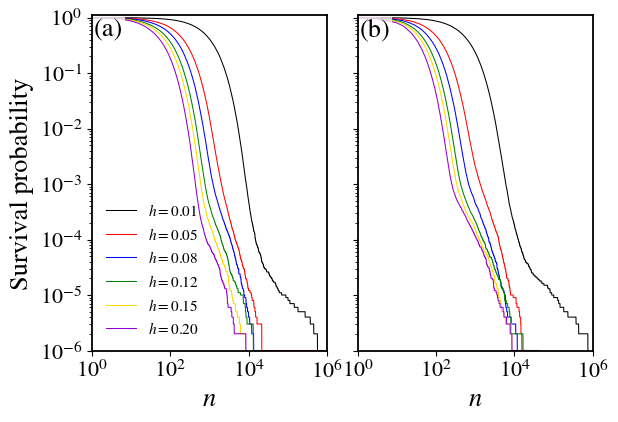

In [16]:
plot_params(legend_fontsize=11, fontsize=19)
hs = [0.01, 0.05, 0.08, 0.12, 0.15, 0.2]
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
lw = 0.75
colors = ["k", "r", "b", "g", "gold", "darkviolet"]
xbox = 0.01
ybox = 0.939
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
for i, h in enumerate(hs):
    df = "%s/survival_prob_gamma=%i_xi=%.5f_h=%.3f_N=%ie%i_nic=%ie%i.dat" % (path, gamma, eps, h, bN, eN, bnic, enic)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array([np.array(df[j]) for j in range(1, len(df.columns))])
    for j in range(2):
        ax[j].plot(x, y[j], lw=lw, c=colors[i], label="$h = %.2f$" % h)
for j in range(2):
    ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox)
ax[0].legend(loc="lower left", frameon=False)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1, N)
ax[0].set_ylim(1e-6, 1.1e0)
ax[0].set_ylabel("Survival probability")
for j in range(2):
    ax[j].set_xlabel("$n$")
plt.subplots_adjust(left=0.1375, bottom=0.14, right=0.9725, top=0.978, hspace=0.05, wspace=0.13)
plt.savefig("Figures/fig5.png", dpi=500)

# Fig. 6

In [19]:
h_ini = 0.01
h_end = 0.20
dh = 0.01
hs = np.arange(h_ini, h_end + dh, dh)
if hs[-1] != h_end:
    hs = hs[:-1]
A = np.zeros((len(hs), 2))
for i, h in enumerate(hs):
    df = "%s/survival_prob_gamma=%i_xi=%.5f_h=%.3f_N=%ie%i_nic=%ie%i.dat" % (path, gamma, eps, h, bN, eN, bnic, enic)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array([np.array(df[j]) for j in range(1, len(df.columns))])
    for j in range(A.shape[1]):
        #fit = np.where(y[j] > 7e-3)
        fit = np.where(y[j] > 7e-2)
        x_fit = x[fit]
        y_fit = y[j][fit]
        A[i, j], _ = np.polyfit(x_fit, np.log(y_fit), 1)

<Figure size 640x480 with 0 Axes>

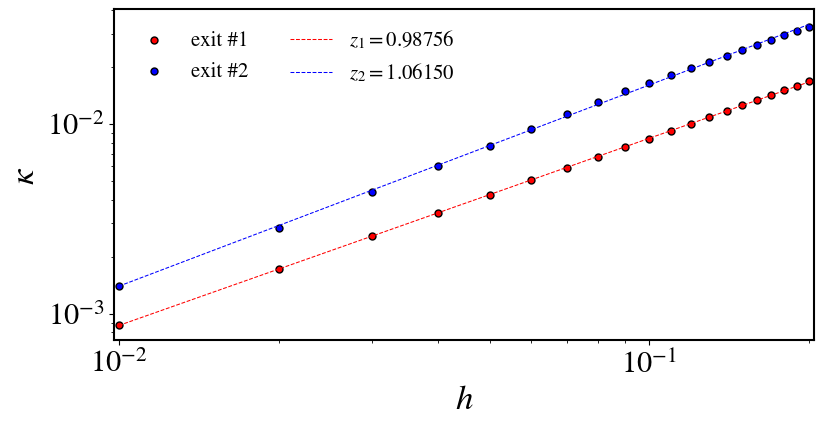

In [20]:
plot_params(fontsize=25, legend_fontsize=15, axes_linewidth=1.5)
fig, ax = plt.subplots(figsize=(8, 4))
lw = 0.75
ms = 25
colors = ["r", "b", "g", "gold", "darkviolet"]
h_ini = 0.01
h_end = 0.20
dh = 0.01
hs = np.arange(h_ini, h_end + dh, dh)
z = np.zeros((A.shape[1], 2))
start = [0, 0, 2, 2]
for j in range(A.shape[1]):
    plt.scatter(hs, -A[:, j], s=ms, c=colors[j], label="exit #%i" % (j + 1), edgecolors="black")
for j in range(A.shape[1]):
    z[j, 0], z[j, 1] = np.polyfit(np.log10(hs[start[j]:]), np.log10(-A[start[j]:, j]), 1)

    x_new = np.linspace(hs.min(), hs.max(), 1000)
    y_new = (10**(z[j, 1]))*x_new**(z[j, 0])
    plt.plot(x_new, y_new, "--", lw=lw, c=colors[j], label="$z_{%i} = %.5f$" % (j + 1, z[j, 0]))

plt.legend(loc="best", frameon=False, ncol=2)
plt.xlabel("$h$")
plt.ylabel("$\kappa$")
plt.xscale("log")
plt.yscale("log")
plt.xlim(9.8e-3, 2.05e-1)
plt.subplots_adjust(left=0.12, bottom=0.1675, right=0.995, top=0.995)
plt.savefig("Figures/fig6.png", dpi=500)

# Fig. 7

<Figure size 640x480 with 0 Axes>

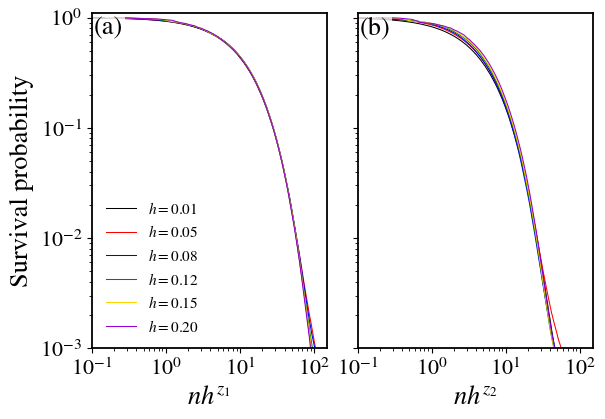

In [23]:
plot_params(legend_fontsize=11, fontsize=19)
hs = [0.01, 0.05, 0.08, 0.12, 0.15, 0.2]
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
lw = 0.75
colors = ["k", "r", "b", "g", "gold", "darkviolet"]
xbox = 0.01
ybox = 0.939
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
for i, h in enumerate(hs):
    df = "%s/survival_prob_gamma=%i_xi=%.5f_h=%.3f_N=%ie%i_nic=%ie%i.dat" % (path, gamma, eps, h, bN, eN, bnic, enic)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array([np.array(df[j]) for j in range(1, len(df.columns))])
    for j in range(2):
        ax[j].plot(x*(h**z[j, 0]), y[j], lw=lw, c=colors[i], label="$h = %.2f$" % h)
for j in range(2):
    ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox)
ax[0].legend(loc="lower left", frameon=False)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1e-1, 1.5e2)
ax[0].set_ylim(1e-3, 1.1e0)
ax[0].set_ylabel("Survival probability")
for j in range(2):
    ax[j].set_xlabel("$nh^{z_{%i}}$" % (j + 1))
plt.subplots_adjust(left=0.1375, bottom=0.14, right=0.9725, top=0.978, hspace=0.05, wspace=0.13)
plt.savefig("Figures/fig7.png", dpi=500)

# Fig. 8

In [24]:
gamma = 3
eps = 0.45
ehs = np.array([2*np.pi/3, 5*np.pi/7, 47*np.pi/63, 7*np.pi/9, 5*np.pi/6, 12*np.pi/13, 17*np.pi/18, 29*np.pi/30, 89*np.pi/90, np.pi]) #np.linspace(ehs_ini, ehs_end, 100)
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**(eN))
n_ic = int(5e6)
enic = int(np.log10(n_ic))
bnic = int(n_ic/10**(enic))
h = 0.20
labels = ["$\\theta_{\\mathrm{exit}} = 2\\pi/3$", "$\\theta_{\\mathrm{exit}} = 5\\pi/7$", "$\\theta_{\\mathrm{exit}} = 47\\pi/63$", "$\\theta_{\\mathrm{exit}} = 7\\pi/9$", "$\\theta_{\\mathrm{exit}} = 5\\pi/6$", "$\\theta_{\\mathrm{exit}} = 12\\pi/13$", "$\\theta_{\\mathrm{exit}} = 17\\pi/18$", "$\\theta_{\\mathrm{exit}} = 29\\pi/30$", "$\\theta_{\\mathrm{exit}} = 89\\pi/90$", "$\\theta_{\\mathrm{exit}} = \\pi$"]

In [25]:
num_coll = int(3e4)
num_ic = 150
np.random.seed(15)
theta = np.random.uniform(0, 2*np.pi, num_ic)
alpha = np.random.uniform(0, np.pi, num_ic)

ps = np.array(Parallel(n_jobs=-1)(delayed(phase_space)(theta[i], alpha[i], gamma, eps, num_coll) for i in range(num_ic)))
ps = ps.reshape((num_ic*(num_coll + 1), 2))

<Figure size 640x480 with 0 Axes>

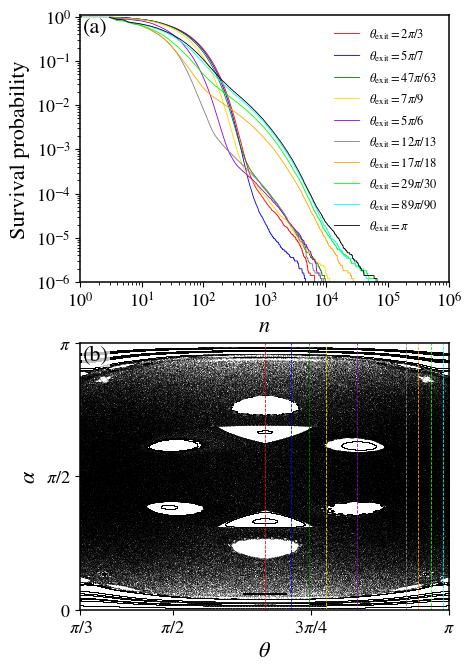

In [27]:
plot_params(fontsize=16, legend_fontsize=9, axes_linewidth=1.1)
fig, ax = plt.subplots(2, 1, figsize=(5, 7))
colors = ["r", "b", "g", "gold", "darkviolet", "grey", "orange", "lime", "cyan", "k"]
lw = 0.6
ms = 3
xbox = 0.0065
ybox = 0.934
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
for i, eh in enumerate(ehs):
    df = "%s/survival_prob_vs_pos_gamma=%i_xi=%.5f_h=%.3f_N=%ie%i_nic=%ie%i_eh=%.10f.dat" % (path, gamma, eps, h, bN, eN, bnic, enic, eh)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[0].plot(x, y, "-", lw=lw, c=colors[i], label=labels[i])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(loc="upper right", frameon=False, ncol=1)
ax[0].set_xlim(1e0, N)
ax[0].set_ylim(1e-6, 1.1e0)
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("Survival probability")

ax[1].plot(ps[:, 0], ps[:, 1], "ko", markersize=0.25, markeredgewidth=0.0)
ax[1].set_xlim(np.pi/3, np.pi)
ax[1].set_ylim(0, np.pi)
ax[1].set_yticks([0, np.pi/2, np.pi])
ax[1].set_yticklabels(["$0$", "$\\pi/2$", "$\\pi$"])
ax[1].set_ylabel("$\\alpha$")
ax[1].set_xticks([np.pi/3, np.pi/2, 3*np.pi/4, np.pi])
ax[1].set_xticklabels(["$\\pi/3$", "$\\pi/2$", "$3\\pi/4$", "$\\pi$"])
ax[1].set_xlabel("$\\theta$")

for i in range(ehs.shape[0]):
    ax[1].plot([ehs[i], ehs[i]], [0, np.pi], "--", c=colors[i], lw=lw)

[ax[i].text(xbox, ybox, "(%s)" % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox) for i in range(ax.shape[0])]

plt.tight_layout(h_pad=0.025)
plt.savefig("Figures/fig8.png", dpi=500, bbox_inches="tight")

# Fig. 9

In [15]:
gamma = 3
eps = 0.45
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**eN)
grid = 1080
num_exits = 2

<Figure size 640x480 with 0 Axes>

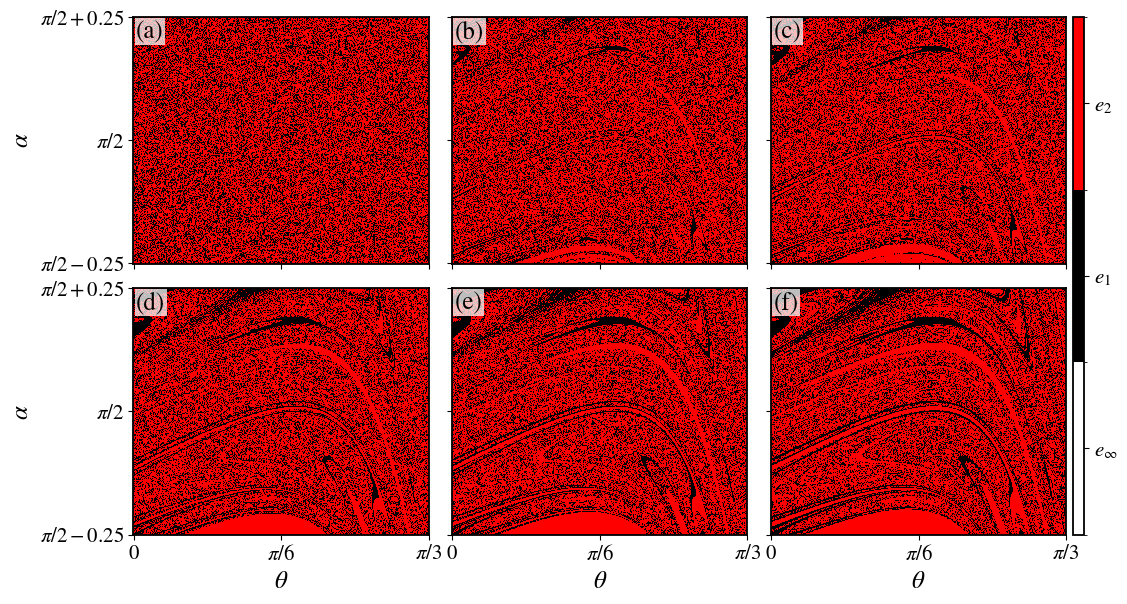

In [17]:
plot_params(fontsize=18)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(11, 5.8))
if num_exits == 2:
    colors = ["white", "black", "red"]
    values = [-1.5, -0.5, 0.5, 1.5]
    ticks = [-1, 0, 1]
    tick_labels = ["$e_\\infty$", "$e_1$", "$e_2$"]
elif num_exits == 3:
    colors = ["white", "black", "red", "gold"]
    values = [-1.5, -0.5, 0.5, 1.5, 2.5]
    ticks = [-1, 0, 1, 2]
    tick_labels = ["$e_\\infty$", "$e_1$", "$e_2$", "$e_3$"]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(values, cmap.N)
xbox = 0.009
ybox = 0.9162
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
dalpha = 0.5
hs = [0.01, 0.05, 0.08, 0.12, 0.15, 0.20]
for i, h in enumerate(hs):
    df = "%s/escape_basin_gamma=%i_eps=%.5f_h=%.3f_N=%ie%i_grid=%i_numexits=%i.dat" % (path, gamma, eps, h, bN, eN, grid, num_exits)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    z = np.array(df[2])
    x = x.reshape((grid, grid))
    y = y.reshape((grid, grid))
    z = z.reshape((grid, grid))
    hm = ax[int(i / 3), i % 3].pcolor(x, y, z, cmap=cmap, norm=norm)
    ax[int(i / 3), i % 3].text(xbox, ybox, "(%s)" % (ascii_lowercase[i]), transform=ax[int(i / 3), i % 3].transAxes, bbox=bbox)
ax[0, 0].set_xticks([0, np.pi/6, np.pi/3])
ax[0, 0].set_xticklabels(["$0$", "$\\pi/6$", "$\\pi/3$"])
ax[0, 0].set_yticks([np.pi/2 - dalpha/2, np.pi/2, np.pi/2 + dalpha/2])
ax[0, 0].set_yticklabels(["$\\pi/2 - %g$" % (dalpha/2), "$\\pi/2$", "$\\pi/2 + %g$" % (dalpha/2)])
[ax[-1, i].set_xlabel("$\\theta$") for i in range(ax.shape[1])]
[ax[i, 0].set_ylabel("$\\alpha$") for i in range(ax.shape[0])]

cbar_ax = fig.add_axes([0.961, 0.0925, 0.01, 0.985-0.0925])
cbar = fig.colorbar(hm, cax=cbar_ax, ticks=ticks)
cbar.ax.set_yticklabels(tick_labels)

plt.subplots_adjust(left=0.107, bottom=0.0925, right=0.955, top=0.985, hspace=0.1, wspace=0.08)
plt.savefig("Figures/fig9.png", dpi=500)

# Fig. 10

In [18]:
gamma = 3
eps_ini = 0.2
eps_end = 0.9
deps = 0.01
epss = np.arange(eps_ini, eps_end + deps, deps)
if abs(epss[-1] - eps_end) > 1e-10:
    epss = epss[:-1]
h_ini = 0.01
h_end = 0.20
dh = 0.005
hs = np.arange(h_ini, h_end + dh, dh)
n = 5
N = int(1e6)
exponent = int(np.log10(N))
base = int(N/10**(exponent))
grid = 1080
dalpha = 0.5
num_exits = 2
Sb = np.zeros((len(epss), len(hs)))
Sbb = np.zeros((len(epss), len(hs)))
for j, eps in enumerate(epss):
    df = "%s/basin_entropy_vs_h_n=%i_gamma=%i_eps=%.5f_N=%ie%i_grid=%i_numexits=%i.dat" % (path, n, gamma, eps, base, exponent, grid, num_exits)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    Sb[j, :] = np.array(df[1])
    Sbb[j, :] = np.array(df[2])
hs, epss = np.meshgrid(hs, epss)

<Figure size 640x480 with 0 Axes>

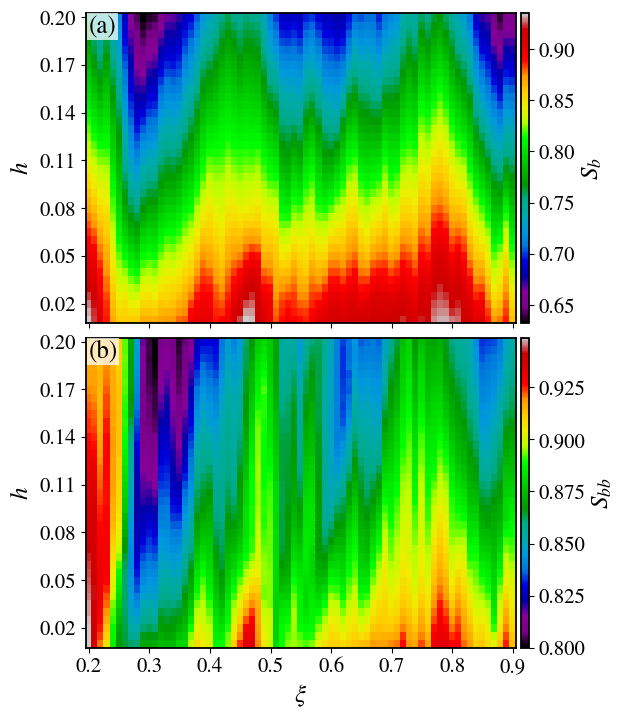

In [19]:
plot_params(fontsize=18)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 7))
lw = 0.75
ms = 4
xbox = 0.006
ybox = 0.9365
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}

hm1 = ax[0].pcolor(epss, hs, Sb, cmap="nipy_spectral", vmin=Sb.min(), vmax=Sb.max())
hm2 = ax[1].pcolor(epss, hs, Sbb, cmap="nipy_spectral", vmin=Sbb.min(), vmax=Sbb.max())

aspect = 40
pad = 0.01
plt.colorbar(hm1, ax=ax[0], label="$S_b$", aspect=aspect, pad=pad)
plt.colorbar(hm2, ax=ax[1], label="$S_{bb}$", aspect=aspect, pad=pad)

ax[0].set_ylabel("$h$")
ax[1].set_ylabel("$h$")
ax[1].set_xlabel("$\\xi$")
ax[0].set_yticks(np.arange(0.02, 0.2 + 0.02, 0.02))

ax[0].text(xbox, ybox, "(a)", transform=ax[0].transAxes, bbox=bbox)
ax[1].text(xbox, ybox, "(b)", transform=ax[1].transAxes, bbox=bbox)
ax[0].set_yticks(np.linspace(0.02, 0.20, 7))
ax[0].set_xticks(np.linspace(0.2, 0.9, 8))
plt.tight_layout(h_pad=0.2, pad=0)
plt.savefig("Figures/fig10.png", dpi=600, bbox_inches="tight")

# Fig. 11

In [2]:
gamma = 3
eps_ini = 0.31
eps_end = 0.38
deps = 0.01
epss = np.arange(eps_ini, eps_end + deps, deps)
if abs(epss[-1] - eps_end) > 1e-10:
    epss = epss[:-1]
h_ini = 0.01
h_end = 0.20
dh = 0.005
hs = np.arange(h_ini, h_end + dh, dh)
n = 5
N = int(1e6)
exponent = int(np.log10(N))
base = int(N/10**(exponent))
grid = 1080
dalpha = 0.5
num_exits = 2
Sb = np.zeros((len(epss), len(hs)))
Sbb = np.zeros((len(epss), len(hs)))
for j, eps in enumerate(epss):
    df = "%s/basin_entropy_vs_h_n=%i_gamma=%i_eps=%.5f_N=%ie%i_grid=%i_numexits=%i.dat" % (path, n, gamma, eps, base, exponent, grid, num_exits)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    Sb[j, :] = np.array(df[1])
    Sbb[j, :] = np.array(df[2])

<Figure size 640x480 with 0 Axes>

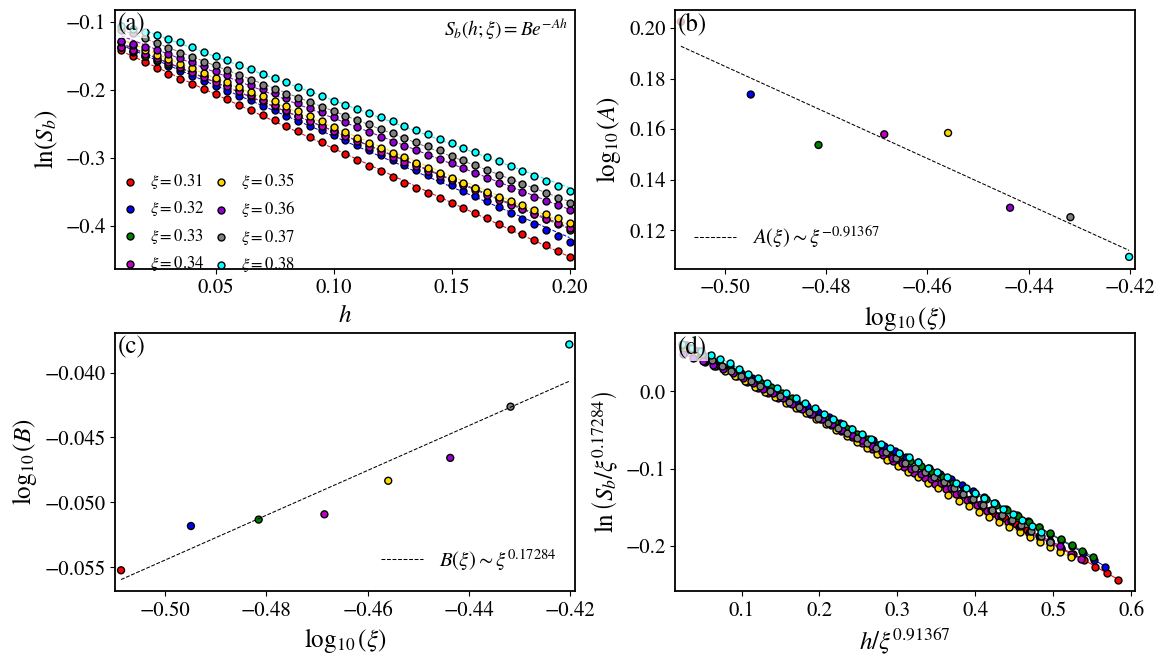

In [3]:
_, legend_fontsize, _ = plot_params(fontsize=18, legend_fontsize=12)
fig, ax = plt.subplots(2, 2, figsize=(12, 7))
lw = 0.75
ms = 25
xbox = 0.0055
ybox = 0.92
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
colors = ["r", "b", "g", "m", "gold", "darkviolet", "grey", "cyan", "lime", "chocolate", "darkviolet", "darkcyan", "salmon", "midnightblue", "lightgrey", "deeppink"]

A = np.zeros_like(epss)
B = np.zeros_like(epss)

for i, eps in enumerate(epss):
    ax[0, 0].scatter(hs, np.log(Sb[i]), s=ms, label="$\\xi = %.2f$" % eps, c=colors[i], edgecolors='black', zorder=1)
    n_fit = 0
    A[i], B[i] = np.polyfit(hs[n_fit:], np.log(Sb[i, n_fit:]), 1)
    B[i] = np.exp(B[i])
    x_new = np.linspace(hs[n_fit:].min(), hs.max(), 1000)
    y_new = B[i]*np.exp(A[i]*x_new)
    ax[0, 0].plot(x_new, np.log(y_new), "--", lw=lw, c=colors[i], zorder=0)

#ax[0,0].legend(loc="lower left", ncol=2, frameon=False, columnspacing=0, handletextpad=0.2)
ax[0, 0].legend(bbox_to_anchor=(0.425, 0.435), loc="upper right", ncol=2, frameon=False, columnspacing=0, handletextpad=0.2)
ax[0, 0].set_ylabel("$\\ln(S_b)$"), ax[0, 0].set_xlabel("$h$")
ax[0, 0].text(0.715, 0.9, "$S_b(h; \\xi) = Be^{-Ah}$", fontsize=14, transform=ax[0, 0].transAxes)
ax[0, 0].set_xlim(0.0075, 0.2025)

###############

ax[0, 1].scatter(np.log10(epss), np.log10(-A), c=colors[:epss.shape[0]], s=ms, edgecolors='black')

ca1, cl1 = np.polyfit(np.log10(epss), np.log10(-A), 1)
x_new = np.linspace(epss.min(), epss.max(), 1000)
y_new = (10**cl1)*x_new**ca1
ax[0, 1].plot(np.log10(x_new), np.log10(y_new), "k--", lw=0.75, label="$A(\\xi) \\sim \\xi^{%.5f}$" % ca1)
ax[0, 1].legend(loc="lower left", frameon=False, fontsize=legend_fontsize + 3)
ax[0, 1].set_xlabel("$\\log_{10}\\left(\\xi\\right)$")
ax[0, 1].set_ylabel("$\\log_{10}(A)$")
ax[0, 1].set_xlim(-0.50975, -0.419)

ax[1, 0].scatter(np.log10(epss), np.log10(B), s=ms, c=colors[:epss.shape[0]], edgecolors='black')
ax[1, 0].set_xlabel("$\\log_{10}(\\xi)$")
ax[1, 0].set_ylabel("$\\log_{10}(B)$")

ca2, cl2 = np.polyfit(np.log10(epss), np.log10(B), 1)
x_new = np.linspace(epss.min(), epss.max(), 1000)
y_new = (10**cl2)*x_new**ca2
ax[1, 0].plot(np.log10(x_new), np.log10(y_new), "k--", lw=0.75, label="$B(\\xi) \\sim \\xi^{%.5f}$" % ca2)
ax[1, 0].legend(loc="lower right", frameon=False, fontsize=legend_fontsize + 3)
ax[1, 0].set_xlim(-0.50975, -0.419)

#################

for i, eps in enumerate(epss):
    ax[1, 1].scatter(hs/(eps**(-ca1)), np.log(Sb[i]/(eps**(ca2))), s=ms, label="$\\xi = %.2f$" % eps, c=colors[i], edgecolors='black', zorder=1)
    ax[1, 1].plot(hs/(eps**(-ca1)), np.log(Sb[i]/(eps**(ca2))), "-", lw=lw, markersize=ms, label="$\\xi = %.2f$" % eps, c=colors[i], zorder=0)
    n_fit = 0
ax[1, 1].set_ylabel("$\\ln\\left(S_b/\\xi^{%.5f}\\right)$" % (ca2))
ax[1, 1].set_xlabel("$h/\\xi^{%.5f}$" % (-ca1))
ax[1, 1].set_xlim(0.015, 0.605)

for i in range(4):
    ax[int(i / 2), i % 2].text(xbox, ybox, "(%s)" % ascii_lowercase[i], transform=ax[int(i / 2), i % 2].transAxes, bbox=bbox)

plt.tight_layout(h_pad=0, w_pad=-0.25)
plt.savefig("Figures/fig11.png", dpi=600, bbox_inches="tight")